In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype(as_frame=True)
df = covtype.data.copy()
df['target'] = covtype.target
df_sample = df.sample(n=5000, random_state=42)

X = df_sample.drop('target', axis=1).values
y = df_sample['target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_dist = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 5, 15),
    'gamma': np.logspace(-4, 2, 15)
}

results = []
convergence_logs = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=i)

    halver = HalvingRandomSearchCV(
        SVC(),
        param_distributions=param_dist,
        factor=3,
        resource='n_samples',
        max_resources=200,
        min_resources=50,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    halver.fit(X_train, y_train)

    best = halver.best_estimator_
    acc = accuracy_score(y_test, best.predict(X_test))

    results.append({
        'Sample #': f'S{i+1}',
        'Best Accuracy': acc,
        'Best Parameters': halver.best_params_
    })

    convergence_logs.append(halver.cv_results_['mean_test_score'])

df_results = pd.DataFrame(results)
print(df_results)

plt.figure(figsize=(12, 6))
for i, log in enumerate(convergence_logs):
    plt.plot(log, marker='o', linestyle='-', label=f'Sample {i+1}')
plt.title('Convergence Plot for All Samples')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 1: Accuracy = 0.5787, Kernel = poly, C = 0.7274, Gamma = 9.6021


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 2: Accuracy = 0.5953, Kernel = rbf, C = 8.4531, Gamma = 4.6032


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 3: Accuracy = 0.598, Kernel = poly, C = 8.7979, Gamma = 9.1008


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 4: Accuracy = 0.6613, Kernel = rbf, C = 1.9348, Gamma = 1.4336


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 5: Accuracy = 0.598, Kernel = linear, C = 1.8522, Gamma = 4.4547


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 6: Accuracy = 0.732, Kernel = rbf, C = 9.2917, Gamma = 0.0591


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 7: Accuracy = 0.6513, Kernel = rbf, C = 0.7936, Gamma = 0.9464


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 8: Accuracy = 0.5473, Kernel = rbf, C = 4.1229, Gamma = 8.315


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 9: Accuracy = 0.6093, Kernel = linear, C = 1.3307, Gamma = 3.4197


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Sample 10: Accuracy = 0.6447, Kernel = rbf, C = 9.6771, Gamma = 2.1653

Final Results:
   Sample  Best Accuracy Best Kernel  Best C  Best Gamma
0       1         0.5787        poly  0.7274      9.6021
1       2         0.5953         rbf  8.4531      4.6032
2       3         0.5980        poly  8.7979      9.1008
3       4         0.6613         rbf  1.9348      1.4336
4       5         0.5980      linear  1.8522      4.4547
5       6         0.7320         rbf  9.2917      0.0591
6       7         0.6513         rbf  0.7936      0.9464
7       8         0.5473         rbf  4.1229      8.3150
8       9         0.6093      linear  1.3307      3.4197
9      10         0.6447         rbf  9.6771      2.1653


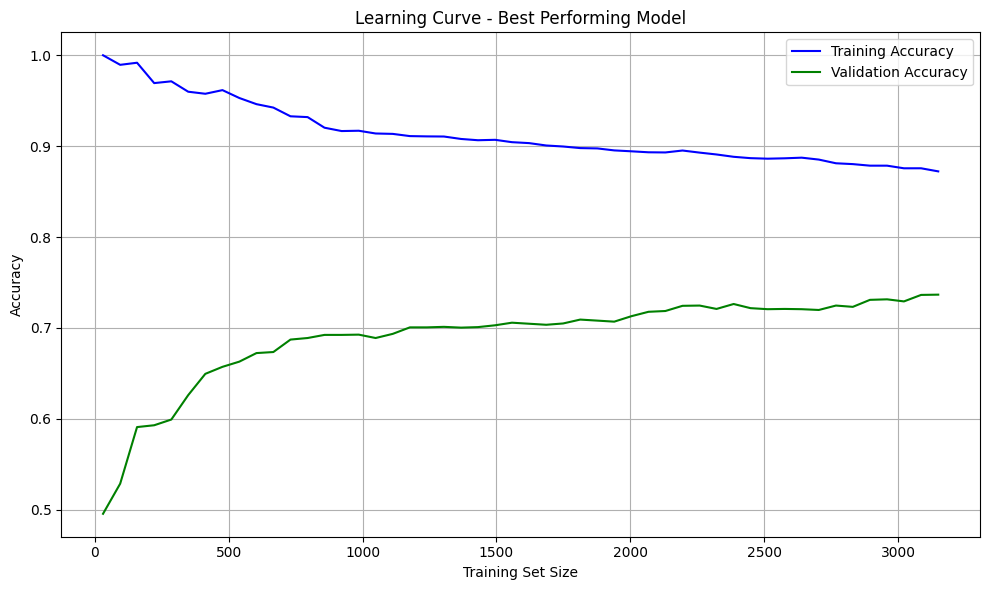

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype(as_frame=True)
X_full = covtype.data
y_full = covtype.target

df = X_full.copy()
df['target'] = y_full

df_sample = df.sample(n=5000, random_state=42)

X = df_sample.drop('target', axis=1).values
y = df_sample['target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

samples = [train_test_split(X_scaled, y, test_size=0.3, random_state=i) for i in range(10)]

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best C', 'Best Gamma'])

def fitnessFunction(kernel, C, gamma, X_train, X_test, y_train, y_test):
    model = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

for i in range(len(samples)):
    X_train, X_test, y_train, y_test = samples[i]
    best_accuracy = 0
    best_C = 0
    best_gamma = 0
    best_kernel = ''

    for kernel in kernels:
        C = np.random.uniform(0.1, 10)
        gamma = np.random.uniform(0.001, 10)
        score = fitnessFunction(kernel, C, gamma, X_train, X_test, y_train, y_test)
        if score > best_accuracy:
            best_accuracy = round(score, 4)
            best_C = round(C, 4)
            best_gamma = round(gamma, 4)
            best_kernel = kernel

    result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]
    print(f"Sample {i+1}: Accuracy = {best_accuracy}, Kernel = {best_kernel}, C = {best_C}, Gamma = {best_gamma}")

print("\nFinal Results:")
print(result)

best_idx = result['Best Accuracy'].idxmax()
X_train, X_test, y_train, y_test = samples[best_idx]
best_kernel = result['Best Kernel'].iloc[best_idx]
best_C = result['Best C'].iloc[best_idx]
best_gamma = result['Best Gamma'].iloc[best_idx]

train_sizes, train_scores, test_scores = learning_curve(
    SVC(kernel=best_kernel, C=best_C, gamma=best_gamma, max_iter=1000),
    X_train, y_train,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 50)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='green')
plt.title('Learning Curve - Best Performing Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
result

,Sample,Best Accuracy,Best Kernel,Best C,Best Gamma
0,1,0.5787,poly,0.7274,9.6021
1,2,0.5953,rbf,8.4531,4.6032
2,3,0.5980,poly,8.7979,9.1008
3,4,0.6613,rbf,1.9348,1.4336
4,5,0.5980,linear,1.8522,4.4547
5,6,0.7320,rbf,9.2917,0.0591
6,7,0.6513,rbf,0.7936,0.9464
7,8,0.5473,rbf,4.1229,8.3150
8,9,0.6093,linear,1.3307,3.4197
9,10,0.6447,rbf,9.6771,2.1653
